In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
d1=pd.read_csv('calories.csv')
d2=pd.read_csv('exercise.csv')

In [19]:
df=pd.concat([d2, d1['Calories']], axis=1)

In [20]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [21]:
df['Gender_Male']=df['Gender'].map({'male': 1, 'female': 0})

In [22]:
df=df.drop(['Gender'], axis=1)
df

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0
...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,1


In [23]:
df.isnull().sum()

User_ID        0
Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
Gender_Male    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_ID      15000 non-null  int64  
 1   Age          15000 non-null  int64  
 2   Height       15000 non-null  float64
 3   Weight       15000 non-null  float64
 4   Duration     15000 non-null  float64
 5   Heart_Rate   15000 non-null  float64
 6   Body_Temp    15000 non-null  float64
 7   Calories     15000 non-null  float64
 8   Gender_Male  15000 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [26]:
x=df.drop(['Calories', 'User_ID'], axis=1)
y=df['Calories']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
y_pred_lr=model.predict(x_test)
y_pred_xgb=xgb_model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

print("\nXGBoost Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("R-squared:", r2_score(y_test, y_pred_xgb))

Linear Regression:
Mean Absolute Error: 8.44151355384971
Mean Squared Error: 131.99574575081692
R-squared: 0.9672937151257295

XGBoost Regressor:
Mean Absolute Error: 1.4984578529596329
Mean Squared Error: 4.568119785030486
R-squared: 0.9988680981634738


<Axes: xlabel='Calories'>

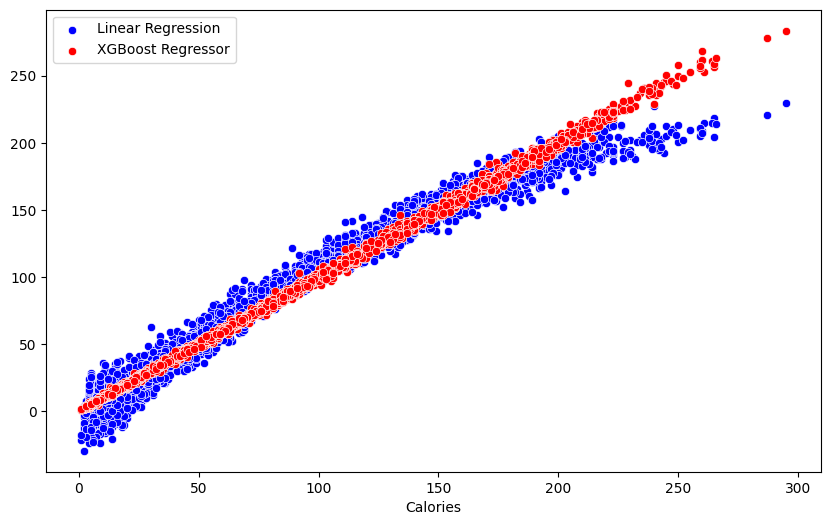

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_xgb, color='red', label='XGBoost Regressor')

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [33]:

y_pred_rf = rf_model.predict(x_test)
print("\nRandom Forest Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
Mean Absolute Error: 1.69494
Mean Squared Error: 7.024979866666666
R-squared: 0.9982593303181986


Text(0.5, 1.0, 'Actual vs Predicted Calories')

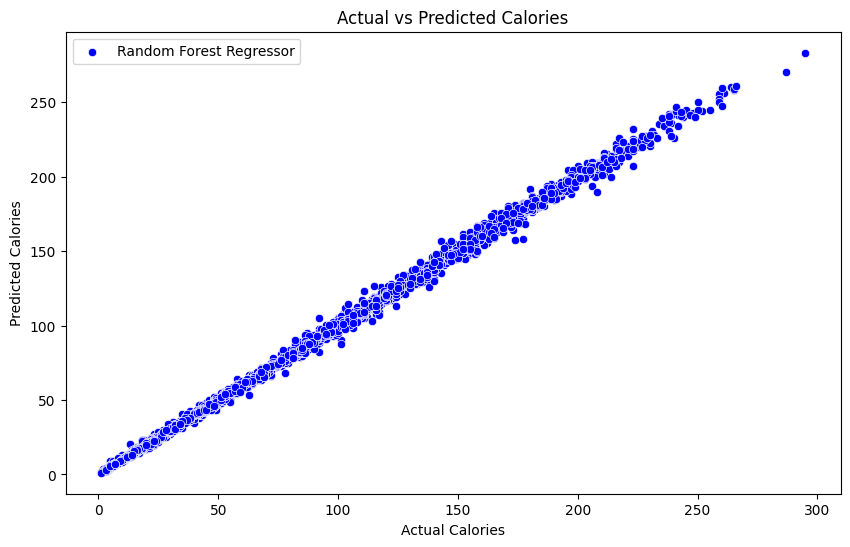

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Random Forest Regressor')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')